# Метод опорных векторов

Импорт необходимых библиотек

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Создание синтетического датасета <br>
Разделение на обучающую и тестовую выборку <br>
Модель классификатора - SVM с различными типами ядер <br>
Обучение моделей и получение прогнозов

In [6]:
X, Y = make_circles(n_samples = 1000, factor = 0.5, noise = 0.1, random_state = 42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 42)

# define model dictionary
modelDict = {
    'Linear': svm.SVC(kernel = 'linear', C = 1),
    'Poly': svm.SVC(kernel = 'poly', degree = 3, C = 1),
    'Rbf': svm.SVC(kernel = 'rbf', C = 1),
    'Sigmoid': svm.SVC(kernel = 'sigmoid', C = 1)
            }

for modelType, model in modelDict.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    score = accuracy_score(Y_test, Y_pred)
    print(f' {modelType} SVM test score is {score:.3f}')

 Linear SVM test score is 0.520
 Poly SVM test score is 0.605
 Rbf SVM test score is 0.975
 Sigmoid SVM test score is 0.515


Вспомогательная функция визуализации границ

In [7]:
def plotDecisionBoundaries(X, Y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = Y, edgecolors = 'k', marker = 'o', s= 50)
    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


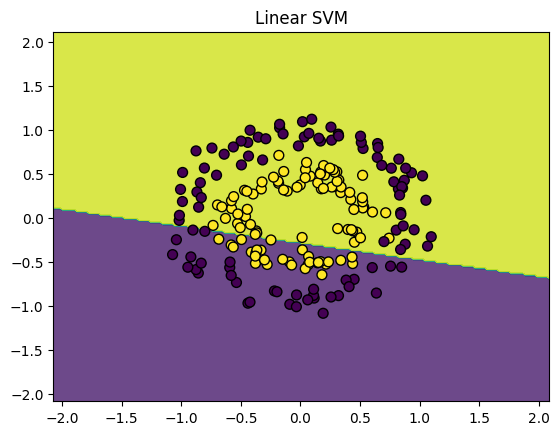

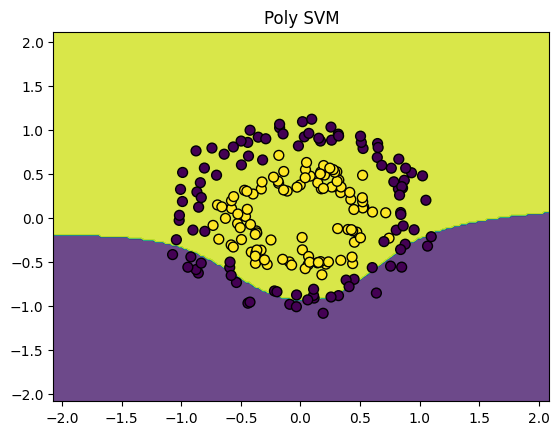

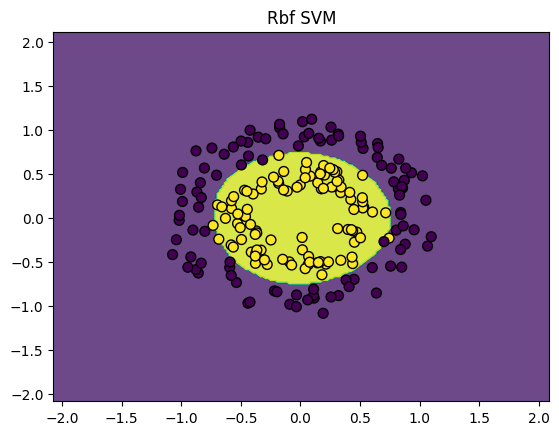

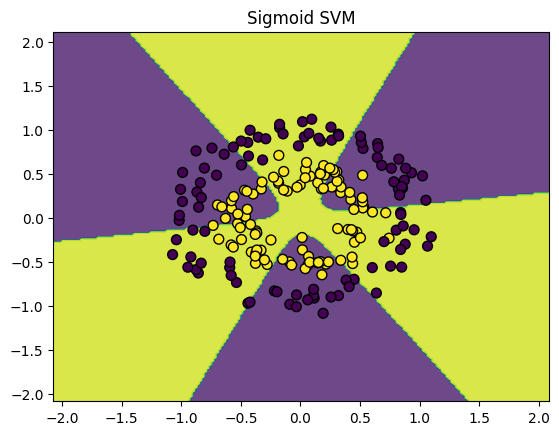

In [8]:
for modelType, model in modelDict.items():
    plotDecisionBoundaries(X_test, Y_test, model, modelType + ' SVM')